# Worksheet 3 - Scientific Visualization MVE080/MMG640
## Uncertainty and geospatial data

Anu Peter


This is the third worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

The below loads the packages required for this homework.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
from plotnine import ggplot, aes, geom_line, geom_crossbar, scale_color_cmap, labs, theme, element_blank, element_text
# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15 and 22 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 5 we visualized uncertainty for point estimates using i) graded error-bars and ii) fuzziness (slide 6). Briefly describe when each kind of visual is suitable.

### Answer 1.1
 When we need to show the range of uncertainty or variability in quantitative data, like in scientific research graded error bars is suitable.We can use fuzziness when dealing with qualitative or uncertain information, it is suitable for lay audience.
### Question 1.2

Another way to visualize uncertainty is a **Hypothetical outcome plots** (Chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/)). Briefly describe the key features of such a visual.

### Answer 1.2

A Hypothetical Outcome Plot (HOP) is an animated visualization that cycles through different equally likely scenarios, using animation to show the variability and uncertainty in the data.  HOPs work well online or in presentations, and they represent probabilities by showing various outcomes. Just make sure the outcomes shown are a good representation of all possibilities.






### Question 1.3

Often when doing regression (fitting a curve to data) we want to do use the regression model to make predictions. What is important to think about when visualizing model predictions?

### Answer 1.3

When showing predictions from a regression model, ensure the curve fits the data, use bands to show uncertainty, state the confidence level, consider different confidence levels, display alternative fits for variability, keep it clear, adapt to the audience, and mention data sources.






### Question 1.4

An important element of a visual is the title, what should be the job of the title?

### Answer 1.4
The title should give the hint to what we mean by the visualization.It give an idae whwt to focus on the visualization.

### Question 1.5

Often when creating visuals of, for example, a trend over time for different categories we have a legend. How would you improve Fig. 20.5 in the course book, to make it easier to digest which line corresponds to which company?

### Answer 1.5
First thing is mathching legends with line graph and use better colour for each line so that it is distinguishable for all kind of people.

## Uncertainty  

For this part reading chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Coffee is undoubtedly a popular beverage (albeit inferior to tea :). On Canvas I have uploaded a dataset with ratings for coffee beans from six different countries. 

Here we are interested in identifying which country on average has the best quality beans. Create two plots, where in i) you plot the mean ($\mu$) and standard deviation for each country (using errorbars), and ii) where you plot the mean and standard error of the mean estimate. Briefly discuss the drawbacks with error-bars. 

As a reminder. For country $j$ with coffee ratings $x^{(j)}_1, \ldots, x^{(j)}_{n_j}$ the sample mean is given by 

$$
\hat{\mu}^{(j)} = \sum_{i = 1}^{n_j} x_i^{(j)},
$$

sample standard deviation by

$$
\hat{\sigma}^{(j)} = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n_j} (x_i^{(j)} - \hat{\mu}^{(j)})^2},
$$

and sample standard error for $\hat{\mu}^{(j)}$

$$
\hat{\sigma}_{\hat{\mu}^{(j)}} = \frac{\hat{\sigma}^{(j)}}{\sqrt{n}}
$$

and a confidence interval with confidence level $1 - \alpha$ is given by;

$$
\hat{\mu}^{(j)} \pm t_{n-1}(1 - \alpha / 2) \hat{\sigma}_{\hat{\mu}^{(j)}}
$$

where $t_{n-1}$ is the t-distribution with $n-1$ degree of freedom. For confidence level $1 - \alpha=0.95$ and $n = 30$ we have that $t_{29}(1 - 0.025) \approx 2.05$.

In [15]:
#df = pd.read_csv("Coffee_tidy.csv")
coffee_data= pd.read_csv("Coffee_tidy.csv")


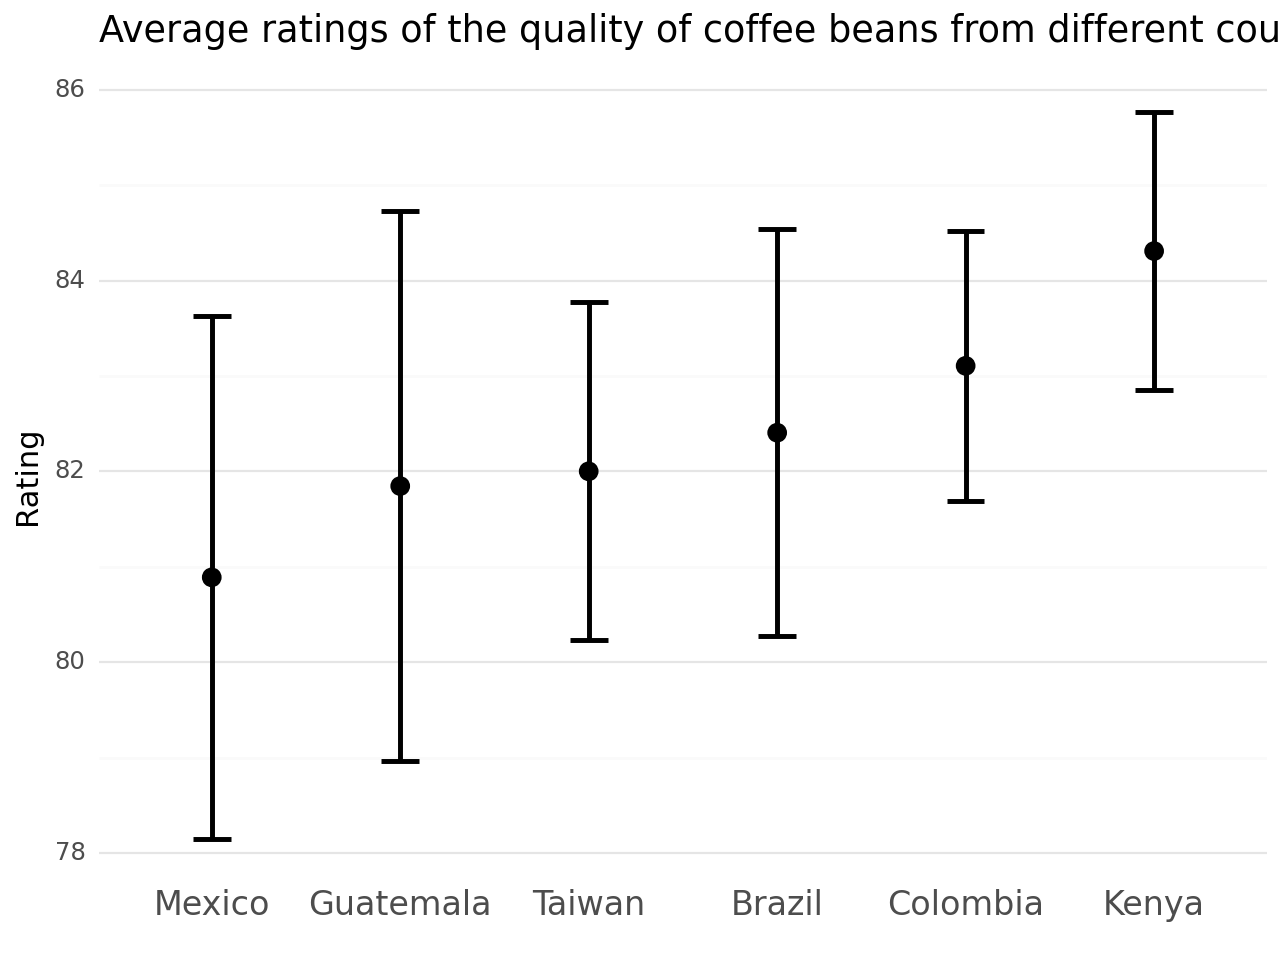

<Figure Size: (640 x 480)>

In [3]:
# Insert code here for visual 1
coffee_data = pd.read_csv("Coffee_tidy.csv")
coffee_sum = coffee_data.copy() #make a copy 

# Group by 'country_of_origin' and calculate mean, std, min, and max of 'total_cup_points'
coffee_sum = coffee_sum.groupby('country_of_origin')['total_cup_points'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Rename the columns
coffee_sum.columns = ['country', 'mean', 'std', 'min', 'max']

#caclulate the standard errors and create a column in the dataset coffee_sum with these standard_errors
standard_error = coffee_data.groupby('country_of_origin')['total_cup_points'].std() / np.sqrt(coffee_data.groupby('country_of_origin')['total_cup_points'].count())
coffee_sum['std_error'] = coffee_sum['country'].map(standard_error)

# Sort the 'coffee_sum' by std_error in ascending order
coffee_sum_sorted = coffee_sum.sort_values(by='mean')

# Convert 'country' column to a categorical variable with the desired order for plotting countries in that order
coffee_sum_sorted['country'] = pd.Categorical(coffee_sum_sorted['country'], categories=coffee_sum_sorted['country'])

#plotting the mean and standard deviation
p1 = (ggplot(coffee_sum_sorted, aes("country", "mean"))
  + geom_point(size=3.0)
  + geom_errorbar(aes(ymin="mean - std", ymax="mean + std"), width=0.2, size=1.0)
  + labs(x = "", y = "Rating", title = "Average ratings of the quality of coffee beans from different countries")
  + theme_minimal()
  + theme(panel_grid_major_x=element_blank(),
          axis_text_x = element_text(size=12)))
p1
# Remember to print the visual 

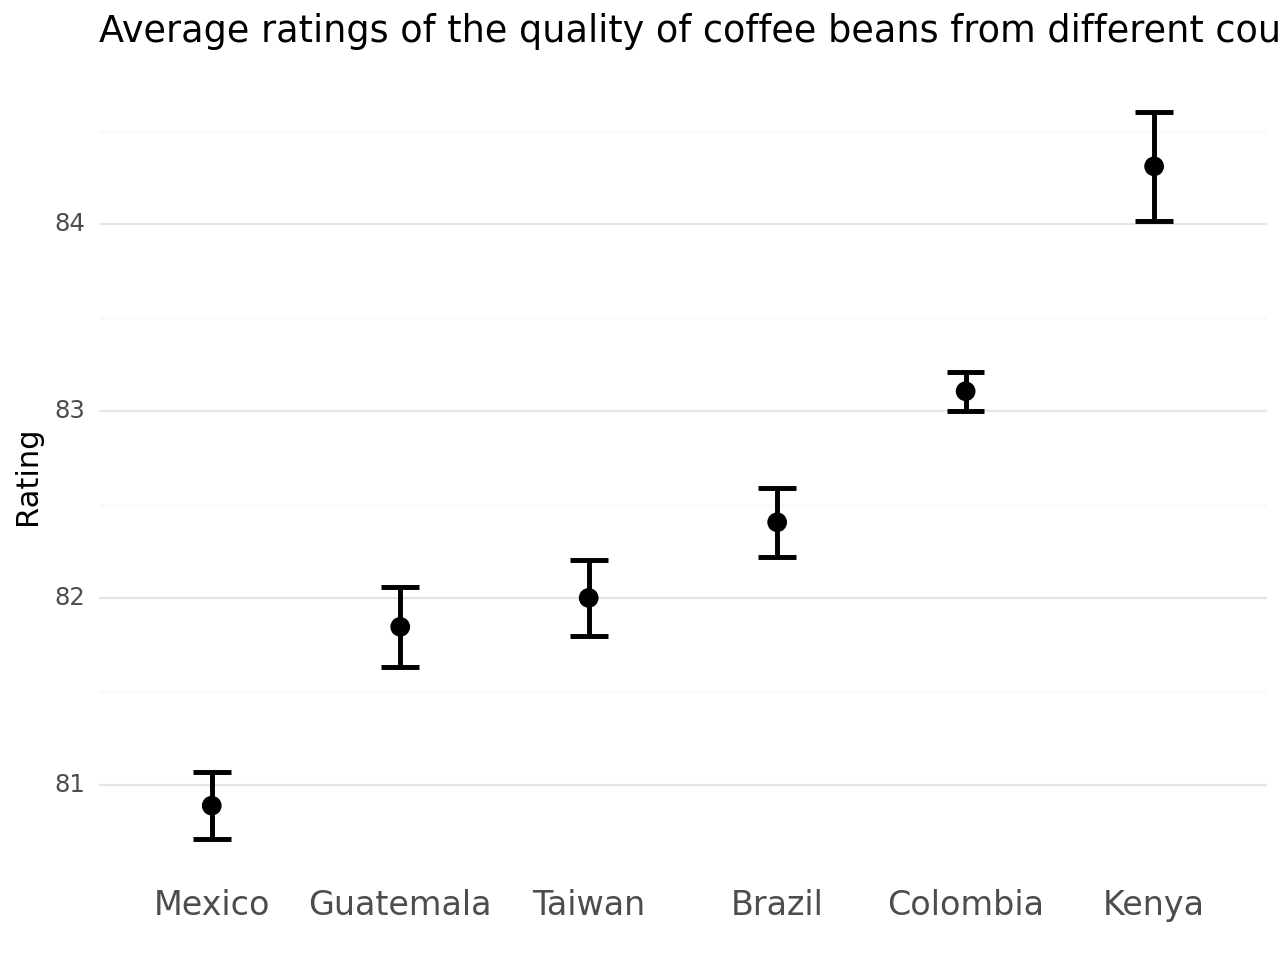

<Figure Size: (640 x 480)>

In [4]:
# Insert code here for visual 2
#plotting the mean and sample standard error of the mean
p2 = (ggplot(coffee_sum_sorted, aes("country", "mean"))
  + geom_point(size=3.0)
  #+ ylim(2.2, 4.0)
  + geom_errorbar(aes(ymin="mean - std_error", ymax="mean + std_error"), width=0.2, size=1.0)
  + labs(x = "", y = "Rating", title = "Average ratings of the quality of coffee beans from different countries")
  + theme_minimal()
  + theme(panel_grid_major_x=element_blank(),
          axis_text_x = element_text(size=12)))
p2

# Remember to print the visual 

The problem with error bars is that they can make things too simple. They show how much data varies, but they might not show the full picture. 


### Question 2.2

Now using the coffee dataset visualize the uncertainty in the mean estimate using i) graded error-bars (here plot confidence intervals with 80%, 90% and 99% confidence) and ii) fuzzy error bars (as in slide 6 in Lecture 5).

In [13]:


# Calculate confidence intervals for 'total_cup_points'
#confidence_level = 0.95
#coffee_data["ci_low"], coffee_data["ci_high"] = zip(*coffee_data["total_cup_points"].apply(
    #lambda x: stats.norm.interval(confidence_level, loc=x, scale=stats.sem(coffee_data["total_cup_points"]))
#))

# Calculate the confidence interval percentage
#coffee_data["ci_percent"] = (coffee_data["ci_high"] - coffee_data["ci_low"]) / coffee_data["total_cup_points"] * 100

# Display the DataFrame with confidence interval information
#print(coffee_data)

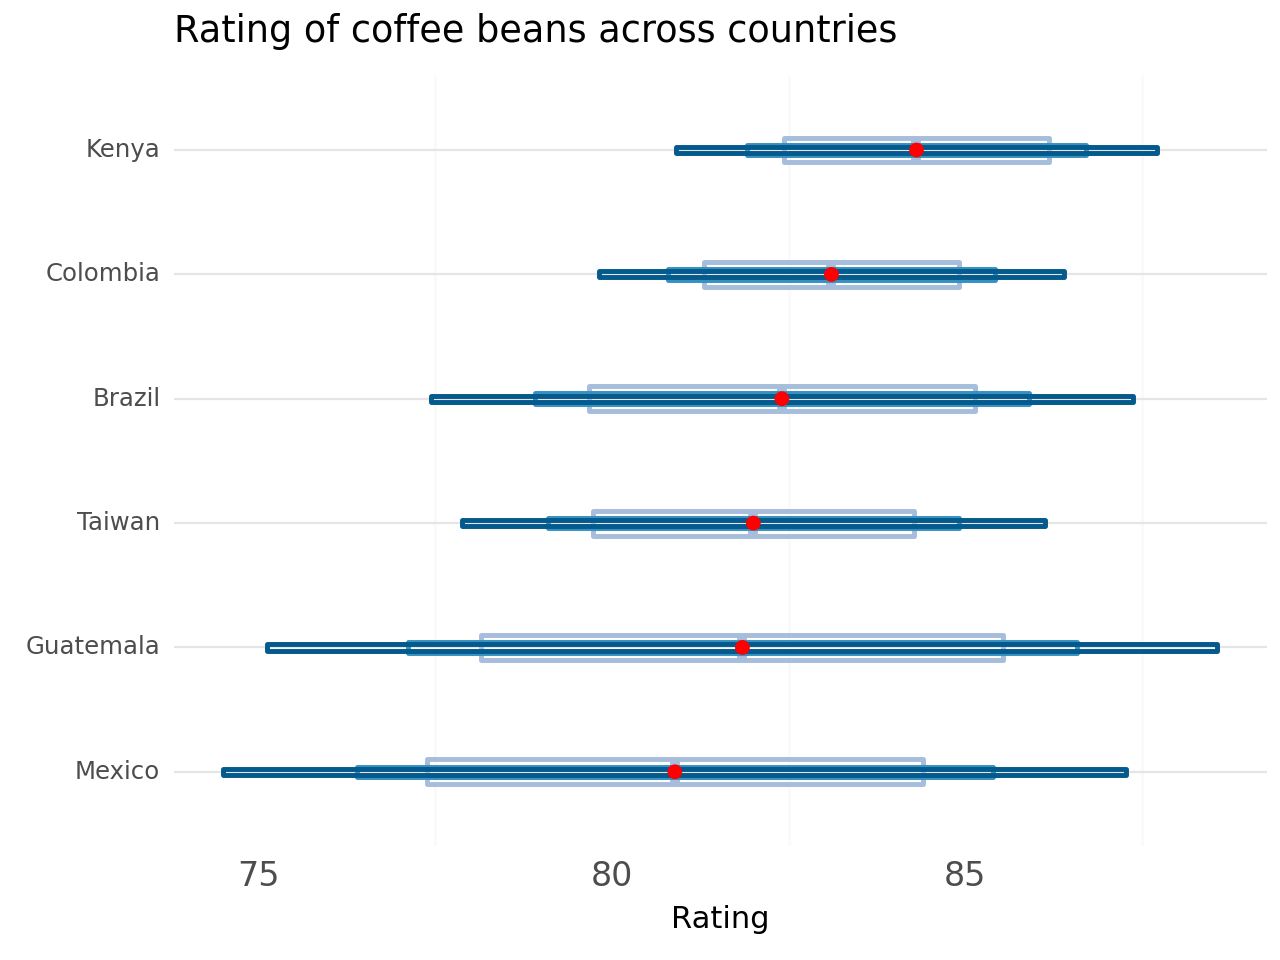

In [14]:
p3 = (ggplot(coffee_sum_sorted, aes("country", "mean"))
      
     
 
      + geom_crossbar(aes(ymin="mean - 1.28*std", ymax="mean + 1.28*std"), width=0.2, size=1.0,color="#a6bddb")
      + geom_crossbar(aes(ymin="mean - 1.64*std", ymax="mean + 1.64*std"), width=0.085, size=1.0,color="#3690c0")
      + geom_crossbar(aes(ymin="mean - 2.33*std", ymax="mean + 2.33*std"), width=0.05, size=1.0,color="#045a8d")
      
       + geom_point(size=2.0, color='red')
      + coord_flip()
      + labs(x="", y="Rating", title="Rating of coffee beans across countries")
      + theme_minimal()
      + theme(panel_grid_major_x=element_blank(),
              axis_text_x=element_text(size=12)))

# Print the visual
print(p3)

In [ ]:

confidence_level = 0.95
critical_value = 1.96  
# Calculate the margin of error
margin_of_error = critical_value * coffee_sum_sorted['std_error']

# Calculate Confidence Interval (CI)
coffee_sum_sorted['CI_low'] = coffee_sum_sorted['mean'] - margin_of_error
coffee_sum_sorted['CI_high'] = coffee_sum_sorted['mean'] + margin_of_error

# Calculate Confidence Interval Percentage
coffee_sum_sorted['CI_percent'] = f'{int((1 - confidence_level) * 100)}%'

# Display the DataFrame with CI values
#print(coffee_sum_sorted[['country', 'mean', 'CI_low', 'CI_high', 'CI_percent']])


In [ ]:



data_fuzzy_tmp = coffee_sum_sorted.query("CI_percent == '5%'")

line_color = np.concatenate([np.linspace(0, 50, 50), np.linspace(50, 0, 50)])
data_fuzzy = pd.DataFrame()

for i in range(data_fuzzy_tmp.shape[0]):
    val_min, val_max = data_fuzzy_tmp["CI_low"].values[i], data_fuzzy_tmp["CI_high"].values[i]
    df_tmp = pd.DataFrame({"val_line": np.linspace(val_min, val_max, 100),
                           "color_line": line_color})
    df_tmp["country"] = data_fuzzy_tmp["country"].values[i]
    data_fuzzy = pd.concat([data_fuzzy, df_tmp])



C:\Users\anu_p\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 8 x 10 in image.
C:\Users\anu_p\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: Figs/Fuzzy_Coffee.png


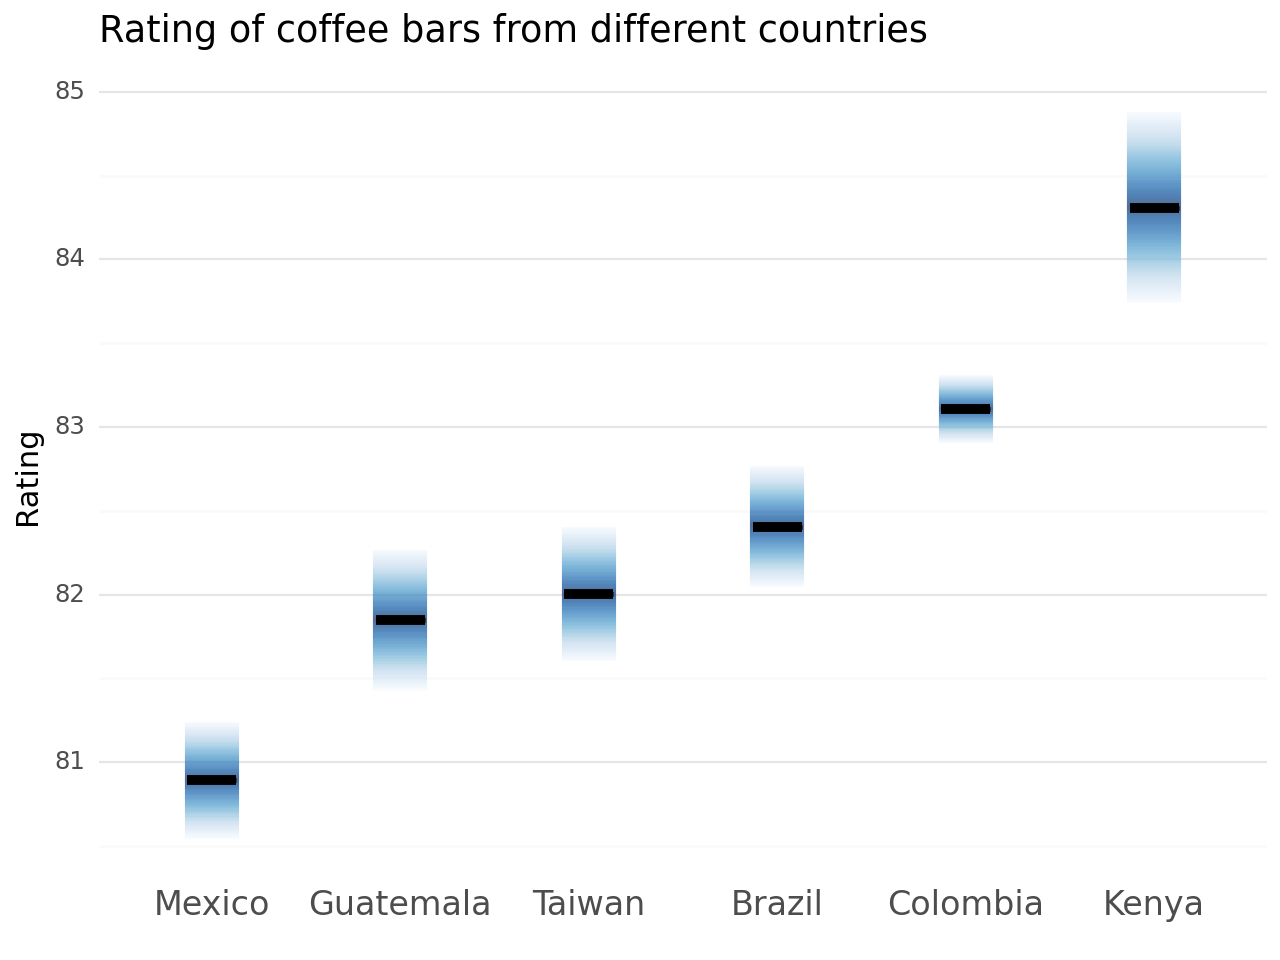

In [ ]:
# Plotting
p = (ggplot(data_fuzzy, aes("country", "val_line"))
     + geom_line(aes(color="color_line"), size=11.0, alpha=0.7)
     + geom_crossbar(data=coffee_sum_sorted, mapping=aes(y="mean", ymin="mean", ymax="mean"), width=0.26, size=1.0)
     + scale_color_cmap("Blues")
     + labs(x="", y="Rating", title="Rating of coffee bars from different countries")
     + theme_minimal()
     + theme(legend_position="none")
     + theme(panel_grid_major_x=element_blank(),
             axis_text_x=element_text(size=12)))
BASE_HEIGHT=10
BASE_WIDTH=8
# Save the plot and display it
p.save("Figs/Fuzzy_Coffee.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
print(p)


### Question 2.3

Frequency graphs are a powerful tool for visualizing probabilities. On Canvas I have uploaded an image of such a graph, please recreate it (you do not have to recreate the colors perfectly). The figure might look strange when rendered in Jupyter (then it is better to save it to disk and see how it looks like),

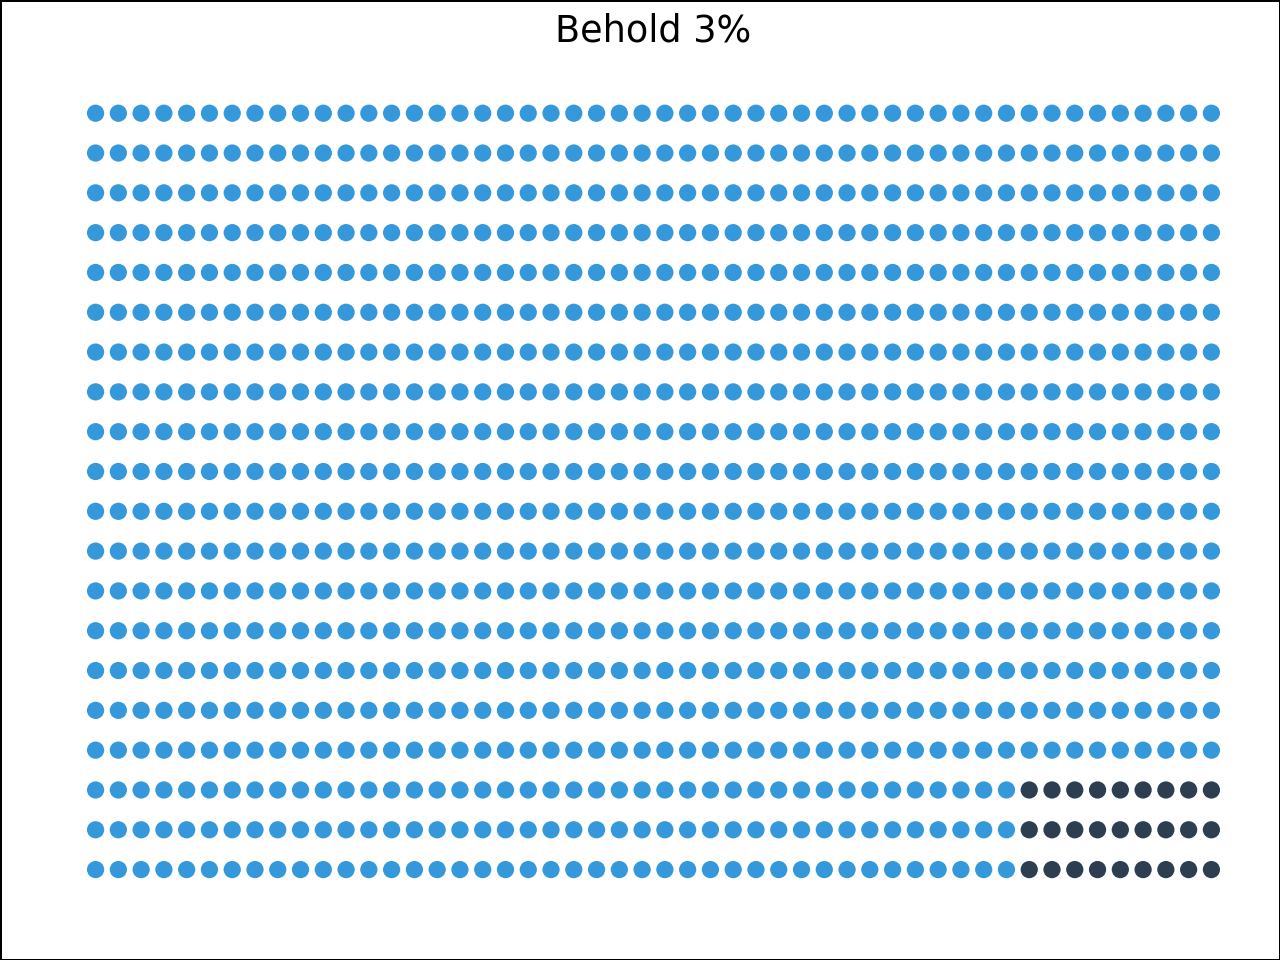

In [ ]:


x = []
y = []
high = []

for i in range(50):
    for j in range(20):
        x.append(i)
        y.append(j)
        if i > 40 and j < 3:
            high.append(1)
        else:
            high.append(0)

data_points = pd.DataFrame({'x': x, "y": y, "high": high})
data_points = data_points.assign(high=pd.Categorical(data_points["high"], categories=[0, 1]))

blue_color = "#3498db"  # Blue color
dark_blue_color = "#2c3e50"  # Dark blue color

p = (ggplot(data_points, aes("x", "y", fill="high"))
     + geom_point(color="none", size=3.0)
     + scale_fill_manual(values=[blue_color, dark_blue_color])
     + labs(x="", y="", title="Behold 3%")
     + theme_minimal()
     + theme(legend_position="none",
             panel_grid_major_x=element_blank(),
             panel_grid_minor_x=element_blank(),
             panel_grid_major_y=element_blank(),
             panel_grid_minor_y=element_blank(),
             axis_text_x=element_blank(),
             axis_text_y=element_blank(),
             plot_background=element_rect(fill='white', alpha=1),
             title=element_text(hjust=0.5))
     )

# Display the plot
print(p)


### Question 2.4

There are different ways to visualize curve fits. One is the fan plot (slide 18 lecture 5) - on Canvas I have uploaded a fan plot and associated dataset, use this dataset to recreate the visual.

**Note** - I generated hypothetical outcomes via bootstraping, for computational speed it might be worthwhile to downsample the hypothetical outcomes.

In [ ]:
# Insert code here 
data_fit = pd.read_csv("Fit_fan.csv")
data_obs = pd.read_csv("Data_obs-1.csv")
data_pred = pd.read_csv("Pred_funnel.csv")
# Remember to print the visual 

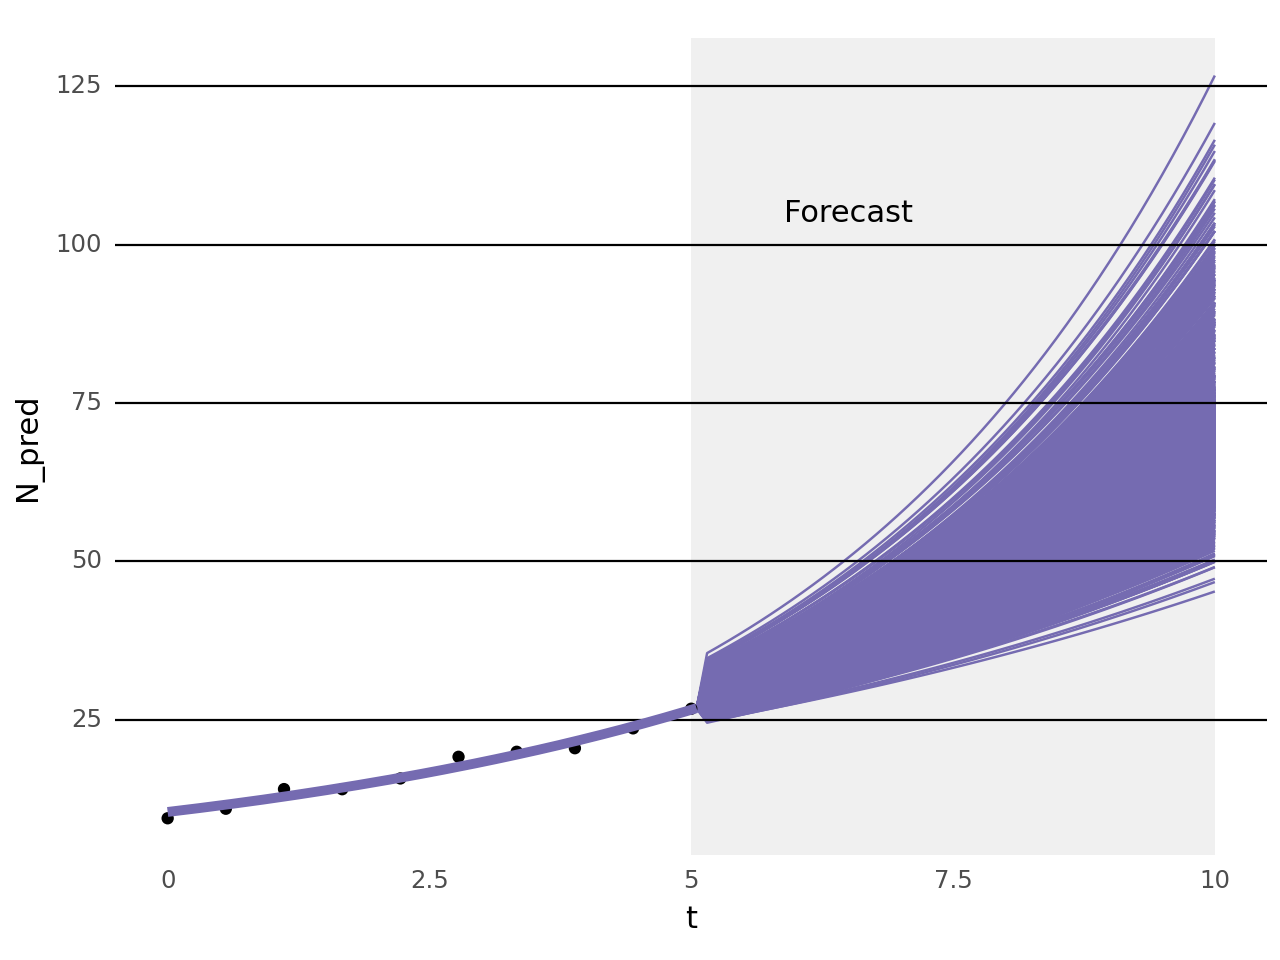

In [ ]:


data_pred = data_pred.assign(index=pd.Categorical(data_pred["index"]))

p = (
    ggplot(data_fit, aes("t"))
    + geom_rect(aes(xmin=5.0, xmax=10.0, ymin=-np.Inf, ymax=np.Inf), fill="#f0f0f0", alpha=1.0)
    + geom_line(data_pred, aes(x="t", y="N_pred", group="index"), color="#756bb1", alpha=1.0)
    + geom_point(data=data_obs, mapping=aes(x="t", y="N"))
    + geom_line(aes(x="t", y="median"), data=data_fit, size=2, color="#756bb1")  # Corrected
    + annotate("text", x=6.5, y=105, label="Forecast")
    + theme_minimal()
    + theme(
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),
        panel_grid_major_y=element_line(color="black"),
        panel_grid_minor_y=element_blank(),
        panel_ontop=True,
    )
)

print(p)


## Storytelling with data

For this part reading chapter 20 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. An important part for making people interact with your visual is that it looks good, therefore, for this part I will also judge the aesthetics of the visual, as well if it efficiently conveys the intended message.

### Question 3.1

To make a visual accessible it is important to think like a designer - and a key feature here is to cleverly use highlighting and text annotations. An example of a well-designed visual is the Goal-attainment visual on slide 25 (lecture 6), to practice annotations recreate it. The dataset is on Canvas. 

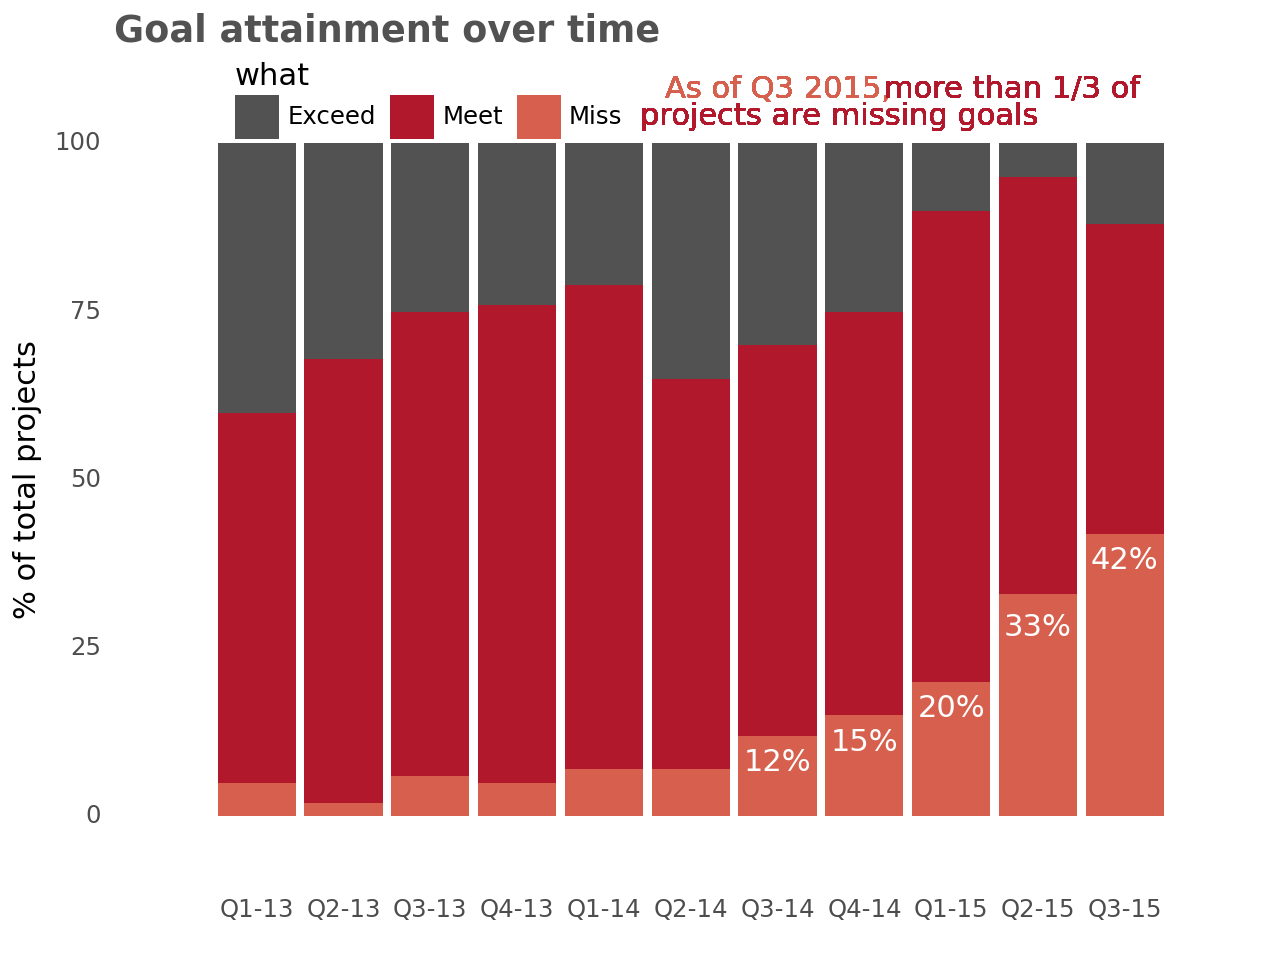

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, scale_fill_manual, scale_x_discrete, scale_y_continuous, geom_text, annotate, labs, theme_minimal, theme, element_text, element_blank

# Assuming cbPalette is defined somewhere in your code
cbPalette = ["#525252", "#b2182b", "#d6604d"]

# Load your data
data_goal = pd.read_csv("Goal_data.csv")
data_goal = data_goal.assign(categories=pd.Categorical(data_goal["categories"], categories=["Q1-13", "Q2-13", "Q3-13", "Q4-13", "Q1-14", "Q2-14", "Q3-14", "Q4-14", "Q1-15", "Q2-15", "Q3-15"]))

# Create the plot
P = (
    ggplot(data_goal, aes(x="categories", y="value", fill="what"))
    + geom_bar(stat="identity")
    + scale_fill_manual(values=cbPalette, name="")
    + scale_x_discrete(expand=(.1, .1))
    + scale_y_continuous(expand=(.1, .1))
    + geom_text(x=7, y=108, label="As of Q3 2015,", color=cbPalette[-1])
    + geom_text(x=9.7, y=108, label="more than 1/3 of", color="#b2182b")
    + geom_text(x=7.71, y=104, label="projects are missing goals", color="#b2182b")
    + annotate("text", x=7, y=8, label="12%", color="white")
    + annotate("text", x=8, y=11, label="15%", color="white")
    + annotate("text", x=9, y=16, label="20%", color="white")
    + annotate("text", x=10, y=28, label="33%", color="white")
    + annotate("text", x=11, y=38, label="42%", color="white")
    + labs(x="", y="% of total projects", title="Goal attainment over time")
    + theme_minimal()
    + theme(legend_position=[0.335, .90],
            panel_grid=element_blank(),
            plot_title=element_text(fontweight="bold", color="#525252"))
)

# Print the visual
print(P)


Briefly comment on why red is a good choice of color in this visual.

The color is appropriate for highlighting things that need to be focused.

### Question 3.2

On slide 23 in lecture 6 I gave the Spanish unemployment data a long needed makeover - specifically I made it accessible for a wider audience. Choose any visual from the slides in lecture 1-5, decide upon a point you want to make, and use the lessons from lecture 6 to make that point accessible. 

Provide motivation to how the changes to the visual has made it more accessible.

In [ ]:
df = pd.read_csv("Spain_tidy.csv")



df['Month'] = df['Month'].astype(str).str.zfill(2)


df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month']
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')


df = df.drop(['Year', 'Month'], axis=1)


df= df[df['Year_Month'].dt.year <= 2009]




In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)


df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the year from the 'DATE' column
df['Year'] = df['DATE'].dt.year


mean_unemployment_per_year = df.groupby('Year')['Number_unemployed'].mean().reset_index()
pd.set_option('display.float_format', '{:.2f}'.format)


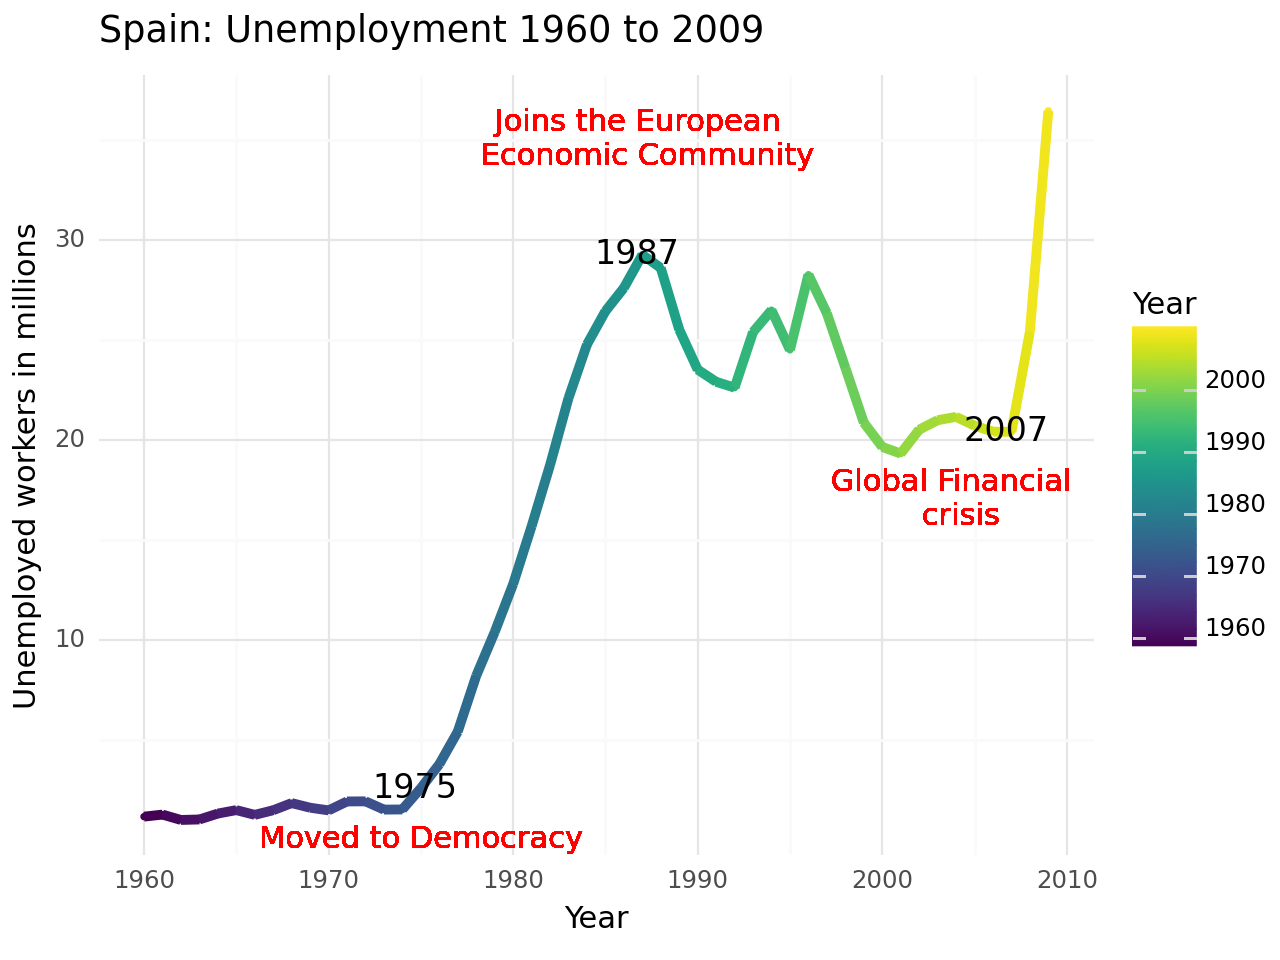

In [ ]:
#from plotnine import ggplot, aes, geom_point, geom_path, scale_color_cmap, scale_y_continuous, geom_text, theme, element_rect, element_text, labs, theme_minimal



pdot_plot = (
    ggplot(mean_unemployment_per_year, aes(x='Year', y='Number_unemployed', color="Year")) +
    geom_point(size=.5) +
    geom_path(size=2) + 
    scale_color_cmap("viridis") +
    
    scale_y_continuous(breaks=[1000000, 2000000, 3000000, 4000000, 5000000], labels=[10, 20, 30, 40, 50]) +
    geom_text(x=1975, y=3, label="Moved to Democracy", color='red') + 
    geom_text(x=2004, y=1700000, label=" Global Financial  \n crisis", color='red') +
     geom_text(x=1987, y=3500000, label=" Joins the European  \n Economic Community", color='red') +
    geom_text(data=mean_unemployment_per_year.loc[mean_unemployment_per_year['Year'].isin([1975, 1987,  2007])],
              mapping=aes(label='Year'), nudge_x=-0.3, nudge_y=0, size=12, color='black') +
    theme(figure_size=(10, 10),
          panel_grid_major_x=element_blank(),
          panel_grid_minor_x=element_blank(),
          panel_grid_major_y=element_blank(),
          panel_grid_minor_y=element_blank(),
          panel_border=element_rect(color='grey', size=2),  
          title=element_text(size=20)  
    ) +
    labs(x="Year", y="Unemployed workers in millions", title="Spain: Unemployment 1960 to 2009") +
    theme_minimal()
    
)

# Display the dot plot
print(pdot_plot)


I have chosen the data from 1960 to 2009 of unemoloyment data of country Spain for Visualiztion.I chose line graph and main years regarding data and reason is mentioned in graph.

### Question 3.3

On Canvas I have uploaded a made-up pie-chart example from a summer pilot program, where student prior and after the program were asked how excited they were about doing science. The program was a success, but, a pie-chart is not a good way to visualize the data. Using lessons from lecture 6 improve the visual, such that a wide audience can identify that the program was a success. 

In the new visual make use of proper highlighting, annotations, a good title, and choose a good form of visualisation. The new visual should include all the data used in the pie chart.

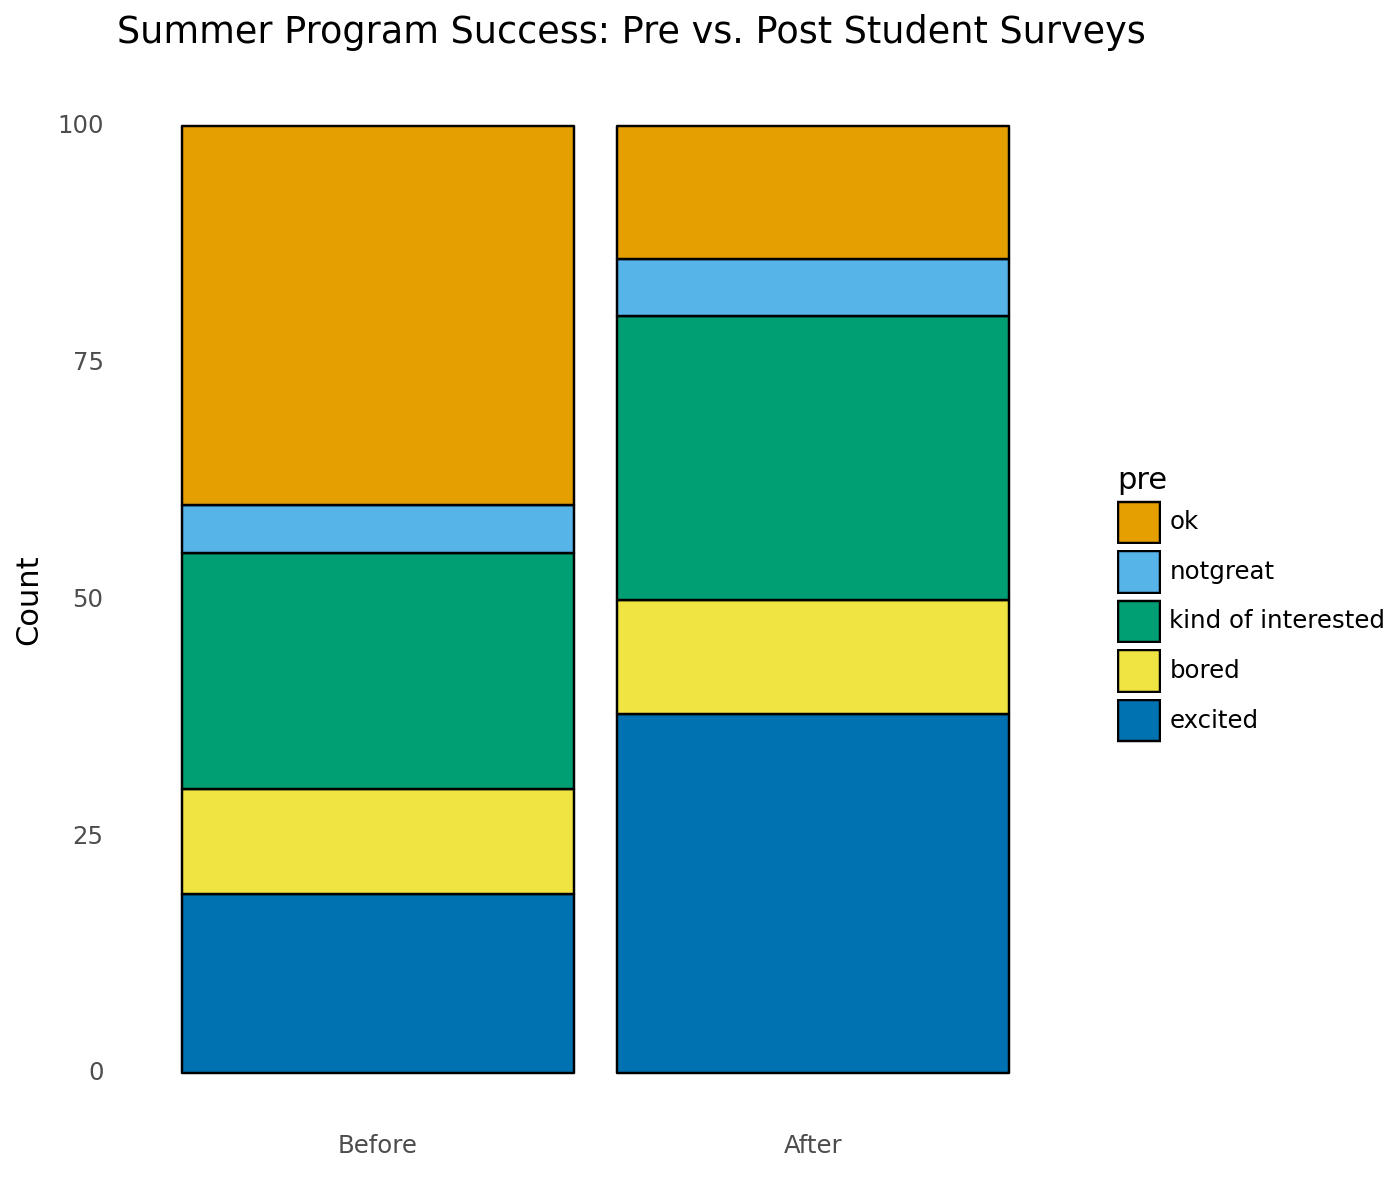

In [12]:
import pandas as pd
from plotnine import *

# Create a DataFrame from the given data
data = {
    'pre': ['bored', 'notgreat', 'ok', 'kind of interested', 'excited'],
    'Before': [11, 5, 40, 25, 19],
    'After': [12, 6, 14, 30, 38]
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=['pre'], value_vars=['Before', 'After'],
                    var_name='count_type', value_name='count')

# Reorder the 'pre' column
pre_order = ['ok', 'notgreat', 'kind of interested', 'bored', 'excited']
df_melted['pre'] = pd.Categorical(df_melted['pre'], categories=pre_order, ordered=True)

# Reorder the 'count_type' variable
count_type_order = ['Before', 'After']
df_melted['count_type'] = pd.Categorical(df_melted['count_type'], categories=count_type_order, ordered=True)

# Define a custom palette with 5 colors
custom_palette = ["#E69F00", "#56B4E9", "#009E73",
                  "#F0E442", "#0072B2", "#D55E00",
                  "#CC79A7", "#999999"]

# Plot the stacked bar chart using plotnine with the custom palette
plot = (ggplot(df_melted, aes(x='count_type', y='count', fill='pre')) +
        geom_col(position='stack', color='black') +
        
        scale_fill_manual(values=custom_palette) +  # Use custom palette
        labs(title='Summer Program Success: Pre vs. Post Student Surveys',
             x='',
             y='Count') +
        theme_minimal() + theme(
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            panel_grid_major_y=element_blank(),
            panel_grid_minor_y=element_blank()
        )
        + theme(figure_size=(7, 6)# theme(axis_text_x=element_text(angle=0, hjust=1)
        ))

# Show the plot
print(plot)


From this kind of visualization it is more clear that kids are more excited about the subject after the session.The category 'excited' is placed on the base of bar chart to make the comparison easy to the audience also used blue color to highlight.

### Question 3.4

Clutter is something we want to remove. On Canvas I have uploaded a visual on performance index for *Our Business* compared to other companies. Improve this visual such that it becomes easy to see how *Our Business* compares against the other companies for each category.

Provide a brief motivation to why your new visual is accessible.

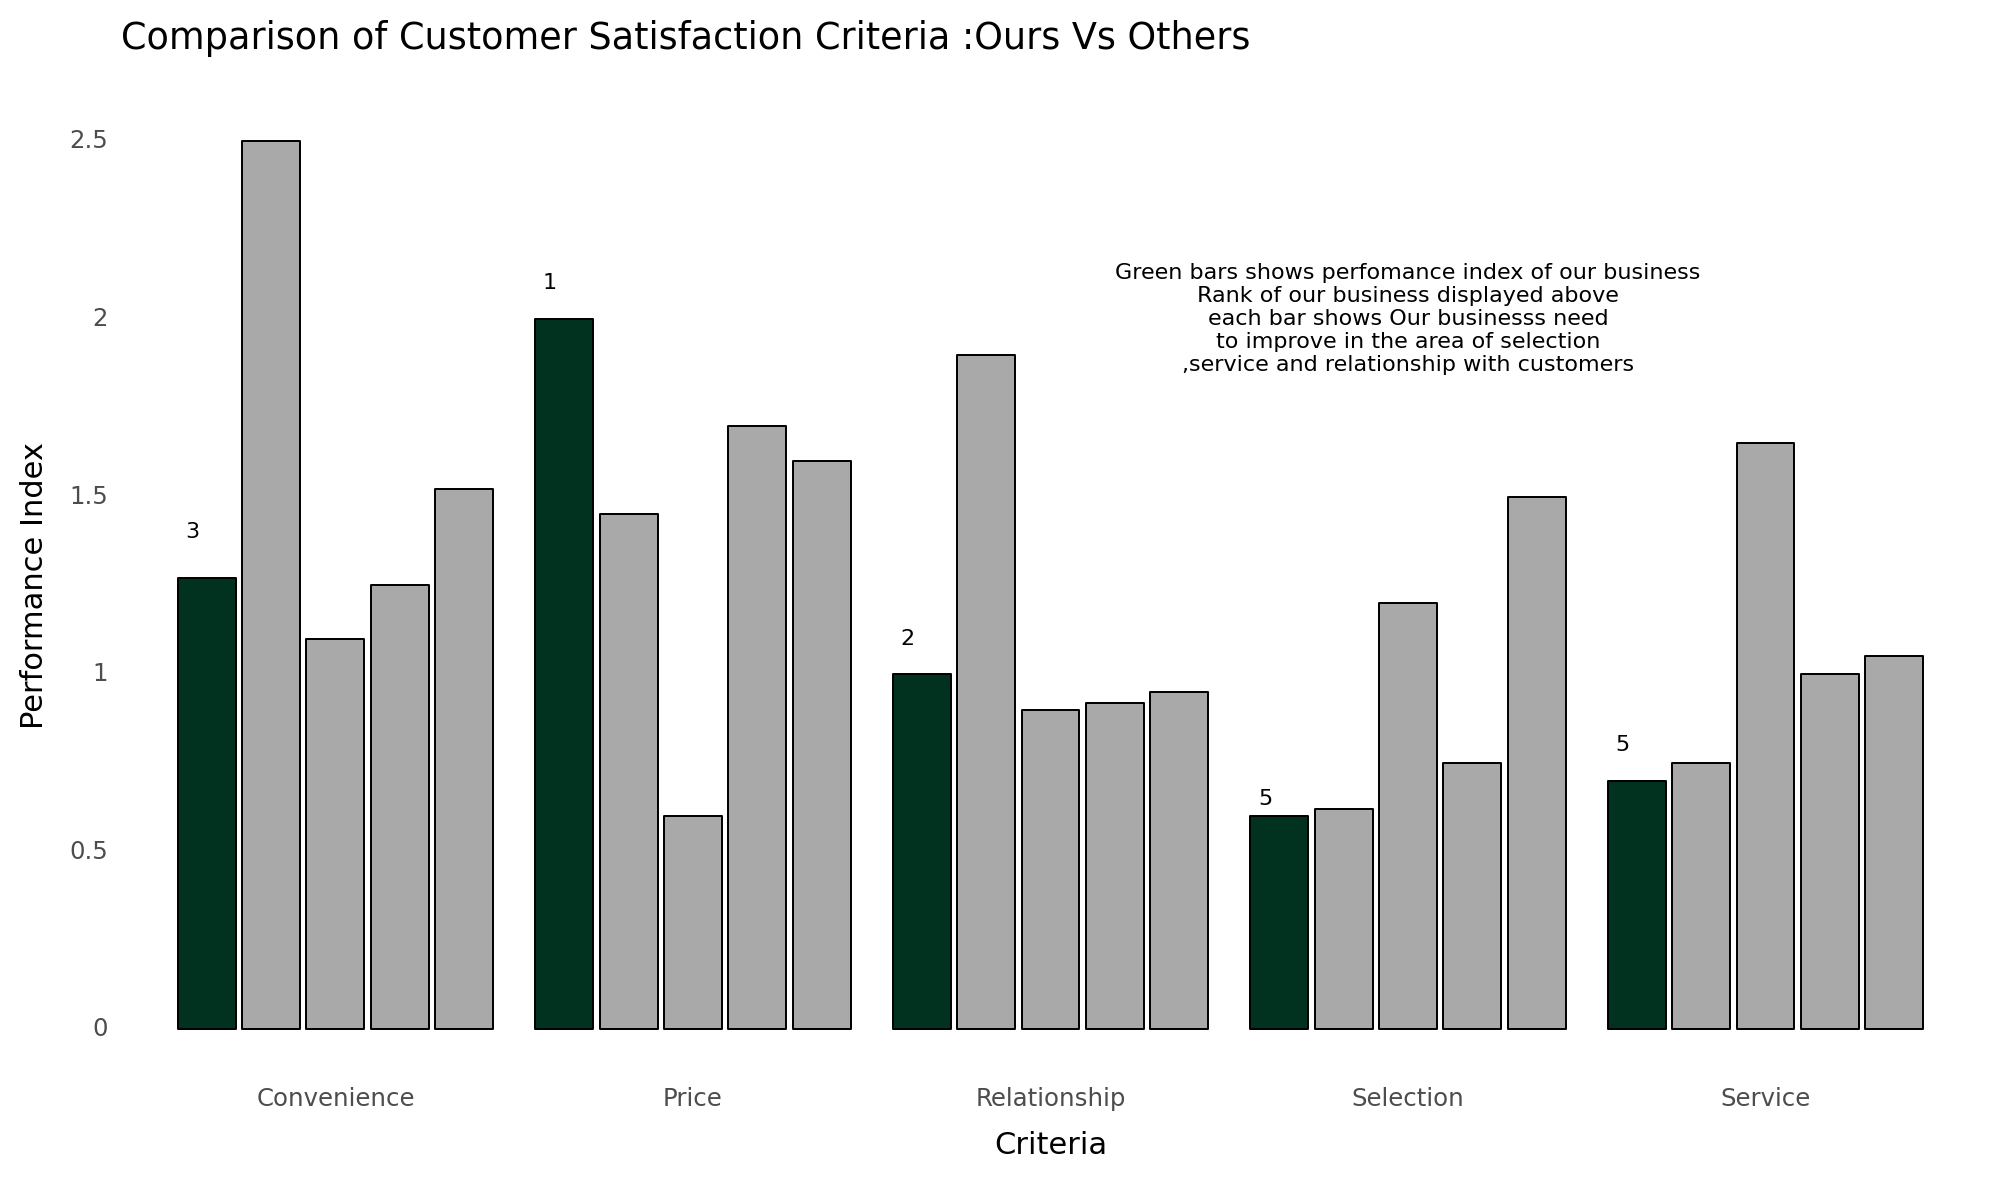

<Figure Size: (1000 x 600)>

In [ ]:
import pandas as pd
from plotnine import *

# Your data
data = {
    'Unnamed: 0': [0, 1, 2, 3, 4] * 5,
    'criteria': ['Selection', 'Convenience', 'Service', 'Relationship', 'Price'] * 5,
    'value': [0.60, 1.27, 0.70, 1.00, 2.00,
              0.62, 2.50, 0.75, 1.90, 1.45,
              1.20, 1.10, 1.65, 0.90, 0.60,
              0.75, 1.25, 1.00, 0.92, 1.70,
              1.50, 1.52, 1.05, 0.95, 1.60],
    'company': ['Our Business'] * 5 + ['A'] * 5 + ['B'] * 5 + ['C'] * 5 + ['D'] * 5
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define color-blind-friendly palette with 'Our Business' color emphasized
palette = ['#013220', '#A9A9A9', '#A9A9A9', '#A9A9A9', '#A9A9A9']

# Reorder the companies in the DataFrame to have 'Our Business' first
company_order = ['Our Business', 'A', 'B', 'C', 'D']
df['company'] = pd.Categorical(df['company'], categories=company_order, ordered=True)

# Plot
p = (ggplot(df, aes(x='criteria', y='value', fill='company'))
     + geom_bar(stat='identity', position='dodge2', colour="black", show_legend=None, size=0.4)
     + labs(title='Comparison of Customer Satisfaction Criteria :Ours Vs Others',
            x='Criteria', y='Performance Index')
     + scale_fill_manual(values=palette)
     + theme_minimal() + theme(
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),
        panel_grid_major_y=element_blank(),
        panel_grid_minor_y=element_blank()
    ) + theme(figure_size=(10, 6), legend_position="none")  # Corrected legend position
)

# Manual annotations
annotations = [
    {'x': .6, 'y': 1.4, 'label': '3'},
    {'x': 1.6, 'y': 2.1, 'label': '1'},
    {'x': 2.6, 'y': 1.1, 'label': '2'},
    {'x': 3.6, 'y': .65, 'label': '5'},
    {'x': 4.6, 'y': .8, 'label': '5'},
    {'x': 4, 'y': 2.0, 'label': 'Green bars shows perfomance index of our business\n Rank of our business displayed above \neach bar ,it shows Our businesss need\nto improve in the area of selection\n,service and relationship with customers'},

]

for annotation in annotations:
    p += annotate('text', x=annotation['x'], y=annotation['y'],
                  label=annotation['label'], size=8, color='black', ha='center')

p


This visualization is a comparison of our 'our business' and other 4 companies' perfomance index.Our business is highlighted using green color and rank of each categorie is displayed above each bar.Things that need to be focused on is written in visualization.